## Vision-based Control (Part 1)

### Section 1: Image Representation (Images as Arrays)
We define how images are represented as arrays

#### 1.1 Import relevant Python packages

In [77]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#### 1.2 Load and display an image

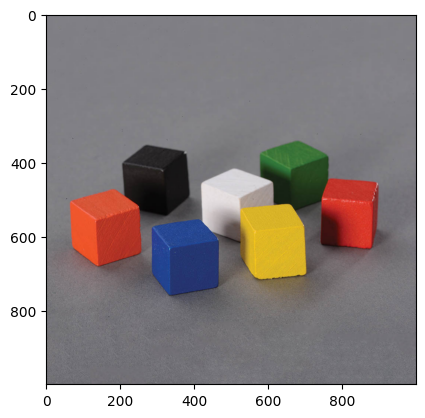

In [78]:
path_to_image = '.\img\cubes.jpg' # Use this if you are on a Windows PC
# path_to_image = './img/cubes.jpg'

# read the image from the directory
img = cv.imread(path_to_image)

# Convert from BGR (OpenCV's default) to RGB (Matplotlib's default)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# display image
plt.imshow(img_rgb)
plt.show()

#### 1.3 Explore image properties

In [79]:
print('Image properties:')
print(f'Image type: {type(img_rgb)}')
print(f'Image shape: {img_rgb.shape}')
print(f'Image size: {img_rgb.size}')


Image properties:
Image type: <class 'numpy.ndarray'>
Image shape: (1000, 1000, 3)
Image size: 3000000


### Section 2: Basic Image Processing

1. Image cropping
2. Image resizing
3. Splitting image channels
4. Merging image channels
5. Converting to different color spaces
6. Pixel value distribution (image histogram)

1. Image cropping

Cropped image shape: (275, 275, 3)


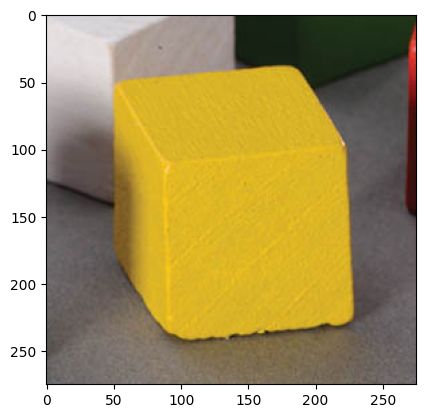

In [80]:
# TODO: Try to isolate the YELLOW cube

img_cropped = img_rgb[475:750, 475:750] #vertical, horizontal
plt.imshow(img_cropped)
print(f'Cropped image shape: {img_cropped.shape}')

2. Resize image

Original image shape: (1000, 1000, 3)
Resized image shape: (2000, 2000, 3)


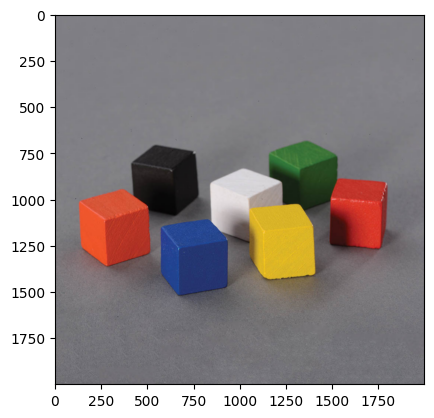

In [81]:
# TODO: Explore the cv.resize function

print(f'Original image shape: {img_rgb.shape}')
img_resize = img_resize = cv.resize(img_rgb, (0,0), fx = 2, fy = 2)
    # takes (src, desired dimensions, optional scale factors)

print(f'Resized image shape: {img_resize.shape}')

plt.imshow(img_resize)

3. Splitting the image channels

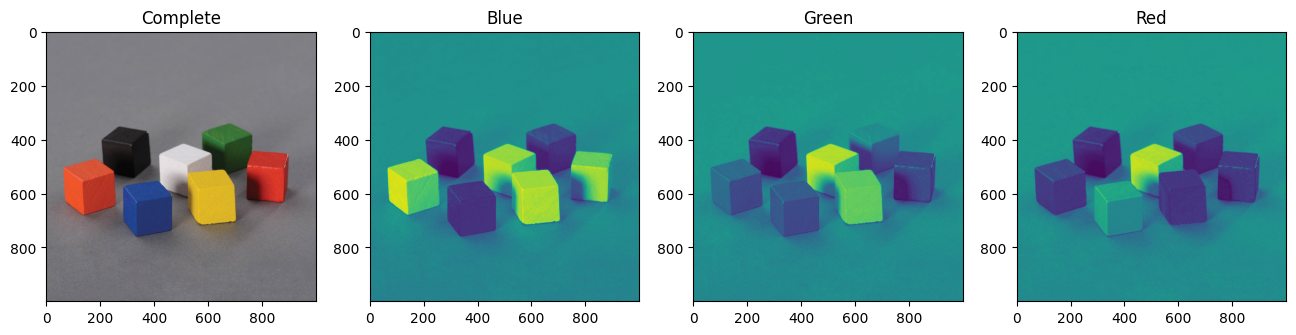

In [82]:
#TODO: RGB images have three (3) channels, use cv.split to isolate each channel and then display them all

channels = cv.split(img_rgb)
    # splits a multi-channel array into singgle channels
    # returns 3 matrices in a list I think since there are 3 channels
titles = ("Complete", "Blue", "Green", "Red")

plt.figure(figsize=(16, 6))
plt.subplot(1,4,1)
plt.imshow(img_rgb), plt.title(titles[0])

for i in range(len(channels)):
    plt.subplot(1,4,i+2)
    plt.imshow(channels[i])
    plt.title(titles[i+1])

plt.show()

4. Merging image channels

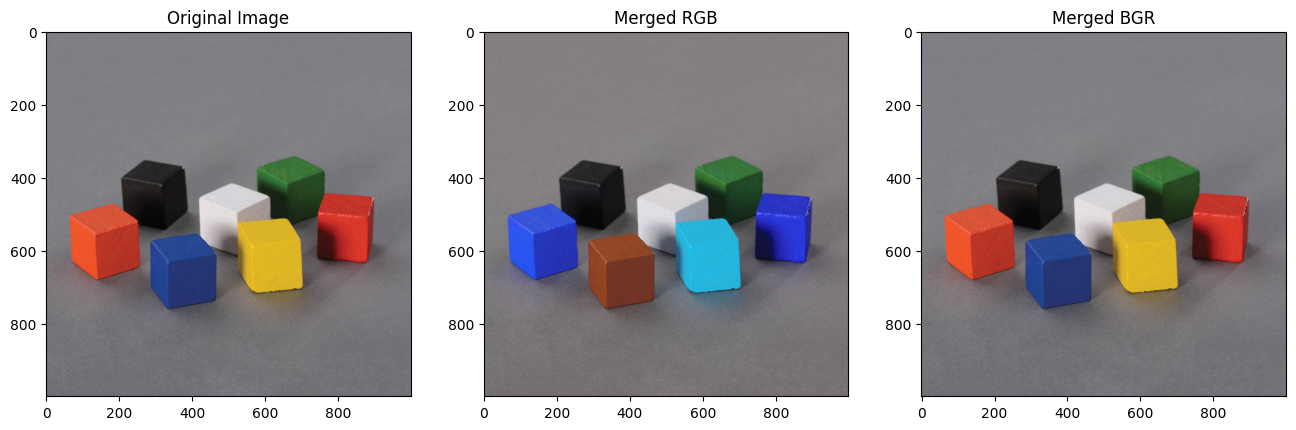

In [83]:
#TODO: What can be split can be merged. Use the cv.merge function to merge the individual channels together

rgb_channels = (channels[2], channels[1], channels[0])
bgr_channels = channels

merged_img_rgb = cv.merge(rgb_channels, 3)
merged_img_bgr = cv.merge(bgr_channels, 3)
    # merge(channels, number of channels you're merging)

#TODO: Does the order of merging matter? Find out!

titles = ['Original Image', 'Merged RGB', 'Merged BGR']
plt.figure(figsize=(16, 6))
plt.subplot(1,3,1)
plt.imshow(img_rgb), plt.title(titles[0])
plt.subplot(1,3,2)
plt.imshow(merged_img_rgb), plt.title(titles[1])
plt.subplot(1,3,3)
plt.imshow(merged_img_bgr), plt.title(titles[2])

plt.show()

5. Converting to different color spaces

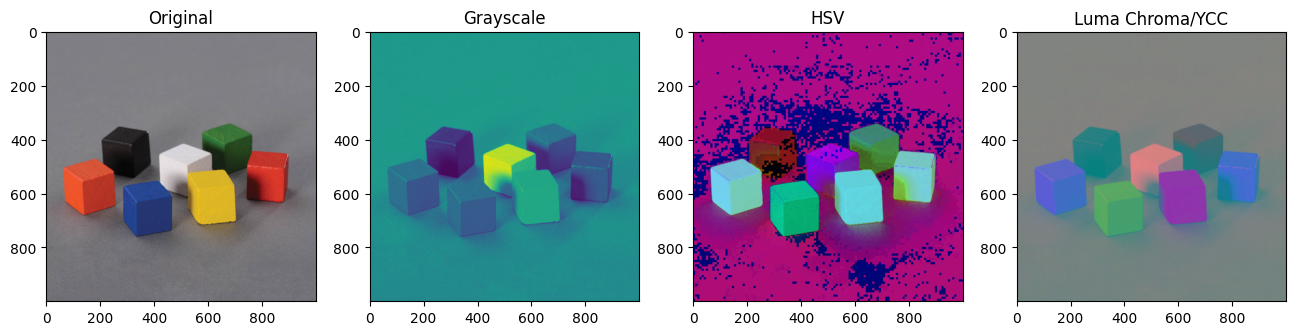

In [84]:
#TODO: Explore different color spaces. Plot the original image in at least 3 other color spaces

# Reference: https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html

img_grayscale = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
img_HSV = cv.cvtColor(img_rgb,  cv.COLOR_BGR2HSV)
img_luma_chroma = cv.cvtColor(img_rgb, cv.COLOR_BGR2YCrCb)
    # cvtColor(image to convert, "flag" which tells it what to convert from and to)

diffColorSpaces = [img_grayscale, img_HSV, img_luma_chroma]
titles = ("Original", "Grayscale", "HSV", "Luma Chroma/YCC")

plt.figure(figsize=(16, 6))
plt.subplot(1,4,1)
plt.imshow(img_rgb), plt.title(titles[0])

for i in range(len(diffColorSpaces)):
    plt.subplot(1,4,i+2)
    plt.imshow(diffColorSpaces[i])
    plt.title(titles[i+1])

plt.show()

6. Pixel value distribution

Min and Max pixel values are: [1, 240]


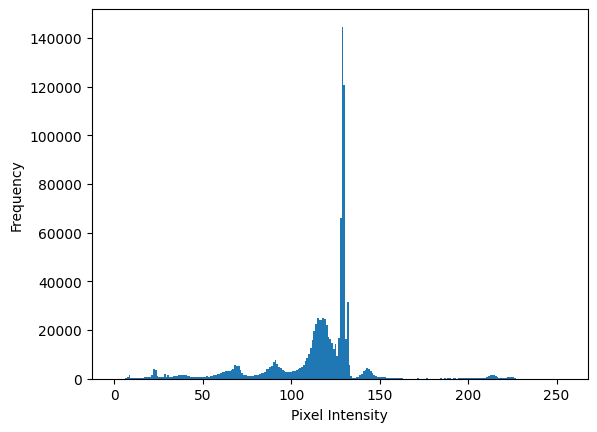

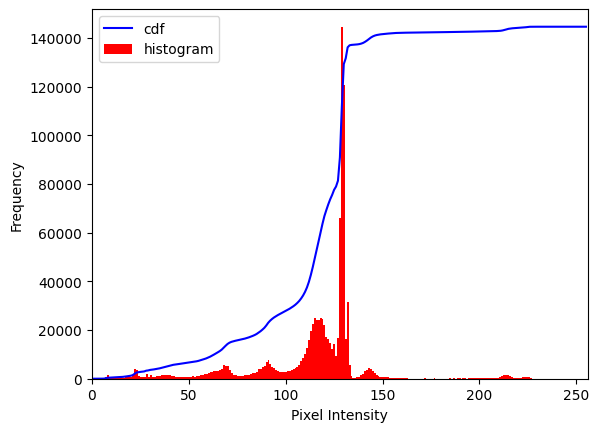

In [85]:
# TODO: Every pixel has a value (0, 255), let's explore the pixel value distribution

# TODO: 1. convert to grayscale
img_gray = img_grayscale


# TODO: 2. find the min and max pixel value
print(f'Min and Max pixel values are: [{np.min(img_gray)}, {np.max(img_gray)}]')


# TODO: 3. create and plot the pixel value distribution as an image histogram
histSize = 256
histRange = (0, 255)
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

# TODO: 4. determine the cumulative distribution and plot it against the pixel value distribution
hist, bins = np.histogram(img_gray.flatten(), histSize, histRange)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()


### Section 3: Image Enhancement

1. Histogram equalization
2. Filtering

#### 1. Histogram equalization

Resource: https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

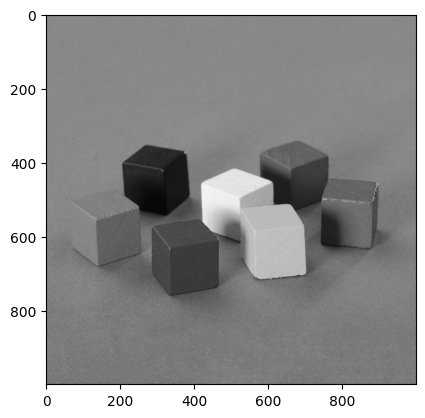

In [86]:
path_to_image = './img/cubes.jpg'
img_gray = cv.imread(path_to_image, cv.IMREAD_GRAYSCALE)

plt.imshow(img_gray, cmap='gray')



Min and Max pixel values are: [0, 240]


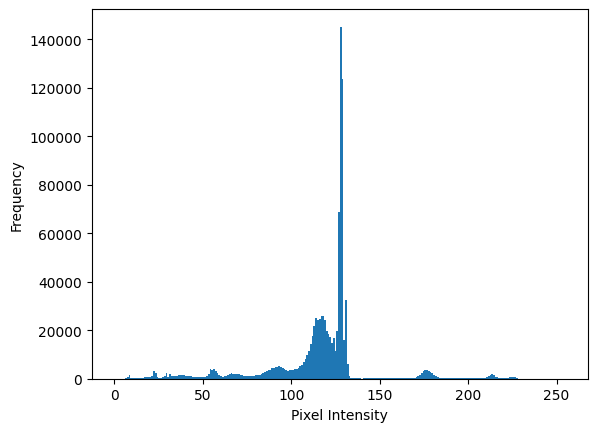

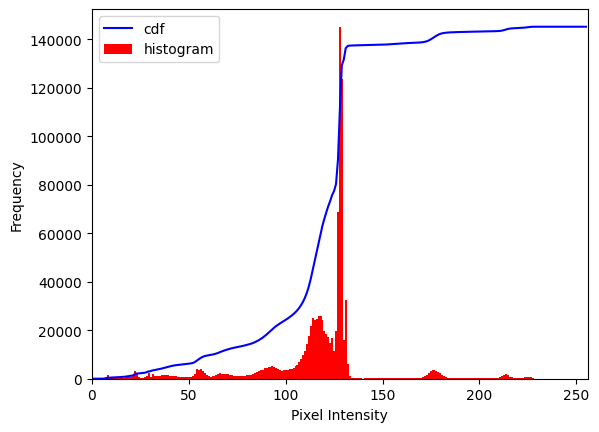

In [87]:
# TODO: Compute and plot the histogram and the cummulative distribution (use similar code as above)

# image is already grayscale

# TODO: 2. find the min and max pixel value
print(f'Min and Max pixel values are: [{np.min(img_gray)}, {np.max(img_gray)}]')


# TODO: 3. create and plot the pixel value distribution as an image histogram
histSize = 256
histRange = (0, 255)
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

# TODO: 4. determine the cumulative distribution and plot it against the pixel value distribution
hist, bins = np.histogram(img_gray.flatten(), histSize, histRange)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()


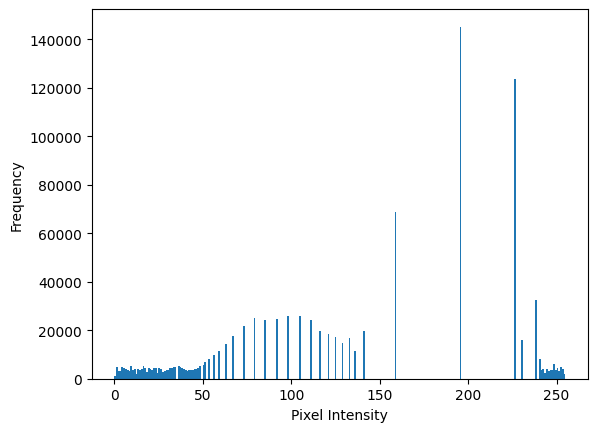

In [88]:
# TODO: Using the cv.equalizeHist, perform histogram equalization and plot the result

equ = cv.equalizeHist(img_gray)

histSize = 256
histRange = (0, 255)
plt.hist(equ.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

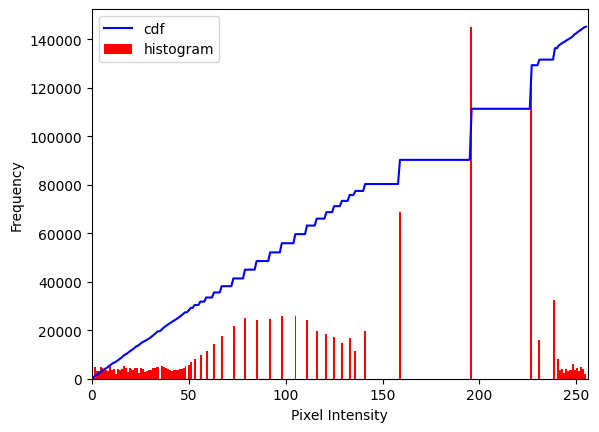

In [89]:
# TODO: Compute and plot the histogram and the cummulative distribution of the equalized image (use similar code as above)

# Can you spot the difference??

hist, bins = np.histogram(equ.flatten(), histSize, histRange)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

#### 2. Image Filtering (smoothing)


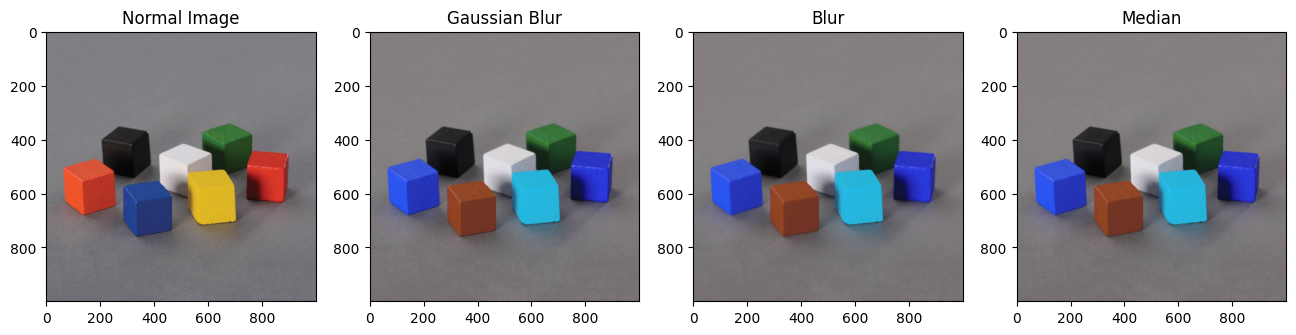

In [90]:
# Resource: https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html 
path_to_image = './img/cubes.jpg'
img = cv.imread(path_to_image)

# TODO: Play around with different filters to get a good outcome
gaussianBlur = blur = cv.GaussianBlur(img,(5,5),0)
blur = cv.bilateralFilter(img, 10, 75, 75)
median = cv.medianBlur(img,5)

diffFilters = [gaussianBlur, blur, median]
titles = ("Normal Image", "Gaussian Blur", "Blur", "Median")

plt.figure(figsize=(16, 6))
plt.subplot(1,4,1)
plt.imshow(img_rgb), plt.title(titles[0])

for i in range(len(diffFilters)):
    plt.subplot(1,4,i+2)
    plt.imshow(diffFilters[i])
    plt.title(titles[i+1])

plt.show()

### Section 4. Pixel-wise Image Segmentation

1. Monochrome image classification (manual approach)
2. Monochrome image classification (adaptive approach and Otsu)
3. Color image classification


1. Monochrome image classification (manual approach)

Min and Max pixel values are: [0, 255]


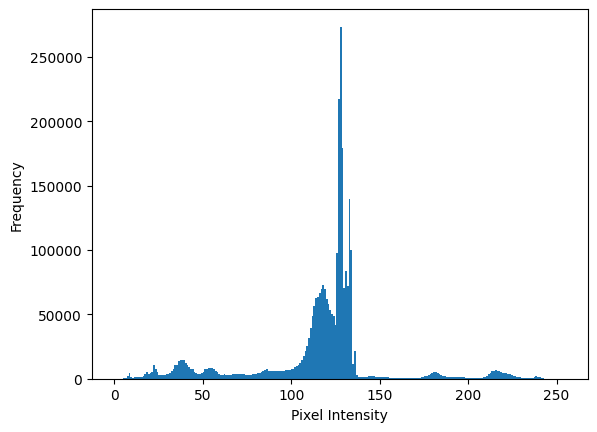

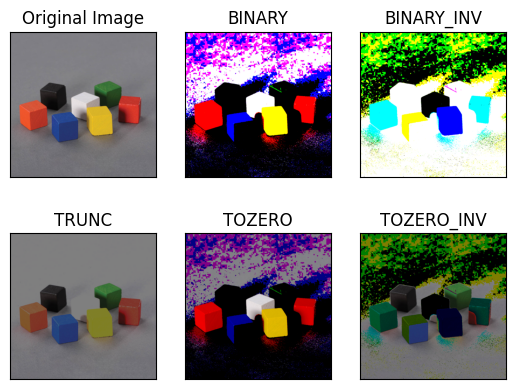

In [91]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Import cubes.jpg
img = cv.imread('./img/cubes.jpg')
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
# plt.imshow(img)

# TODO: Inspect the pixel value distribution to determine a good threshold
print(f'Min and Max pixel values are: [{np.min(img)}, {np.max(img)}]')
# create and plot the pixel value distribution as an image histogram
histSize = 256
histRange = (0, 255)
plt.hist(img.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

# TODO: Use cv.threshold to apply a binary threshold on the image and plot the outcome 
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
    # returns threshold used (127 in this case) and then thresholded image
 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
 
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()


2. Monochrome image classification (adaptive approach and Otsu)

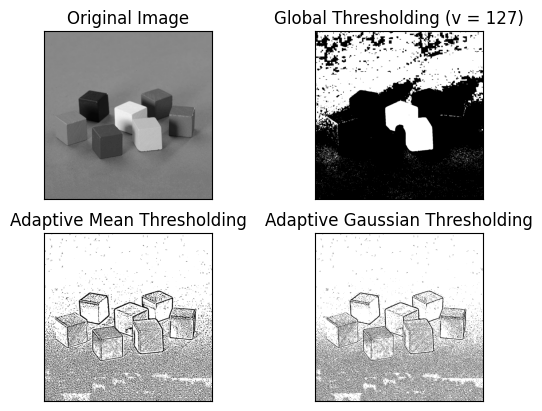

In [92]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Use cv.adaptiveThreshold to apply a binary threshold on the image and plot the outcome
img = cv.imread('./img/cubes.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        # binary thresholding like this can only be done on a greyscale image!

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

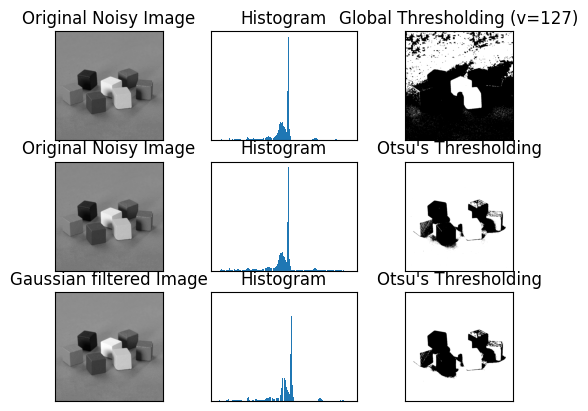

In [93]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Use the otsu method to apply a binary threshold on the image and plot the outcome
img = cv.imread('./img/cubes.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
 
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
 
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
 
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# TODO: What are your observations?

3. Color image classification

Resource: https://realpython.com/python-opencv-color-spaces/ 

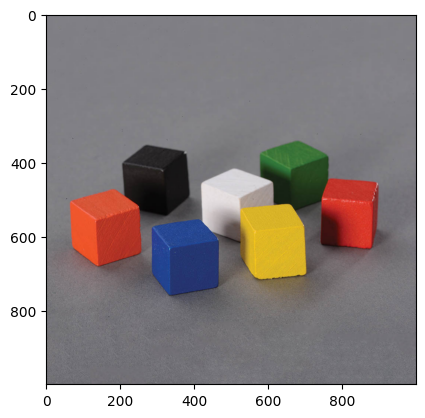

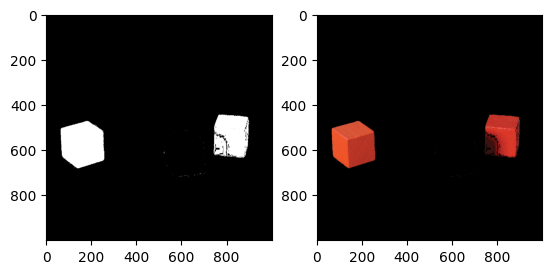

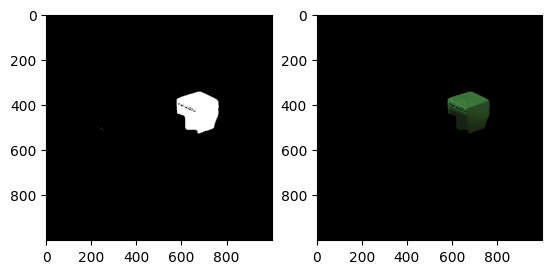

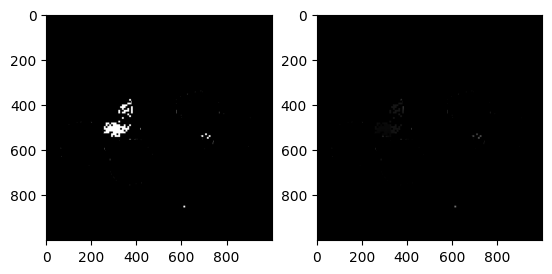

In [94]:
# TODO: Follow the resource above to define a color mask

img = cv.imread('./img/cubes.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# plt.imshow(hsv_img)
# plt.show()

# colors are in HSV colorspace
dark_red = (0, 100, 0)
light_red = (15, 255, 255)

# dark_blue = (250, 0, 0)
# light_blue = (200, 255, 255)

dark_green = (39, 50, 0)
light_green = (64, 255, 255)

dark_yellow = (40, 50, 0)
light_yellow = (55, 255, 255)

black = (0, 0, 0)
white = (360, 0, 255)


# red and orange 
mask = cv.inRange(hsv_img, dark_red, light_red)
    # returns an array of 1s and 0s based on image input, upper threshold, and lower threshold 
    # includes all within threshold range
red_result = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(red_result)
plt.show()


# # blue
# mask = cv.inRange(hsv_img, dark_blue, light_blue)
# result = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

# plt.subplot(1, 2, 1)
# plt.imshow(mask, cmap="gray")
# plt.subplot(1, 2, 2)
# plt.imshow(result)
# plt.show()


# green
mask = cv.inRange(hsv_img, dark_green, light_green)
result = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

# # yellow
# mask = cv.inRange(hsv_img, dark_yellow, light_yellow)
# result = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

# plt.subplot(1, 2, 1)
# plt.imshow(mask, cmap="gray")
# plt.subplot(1, 2, 2)
# plt.imshow(result)
# plt.show()


# black and white
mask = cv.inRange(hsv_img, black, white)
result = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

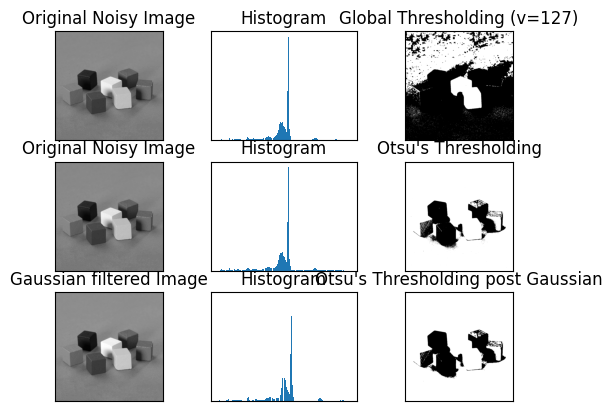

In [95]:
# TODO: Could you apply the Otsu approach to this as well? Give it a try.
img = cv.imread('./img/cubes.jpg') # included so it runs fine if you run this cell several times in a row
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
 
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    # was throwing error because I was trying to pass a color image in again! 
    # Needs to threshold only one channel, had to make it greyscale again
 
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
 
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding post Gaussian"]
 
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

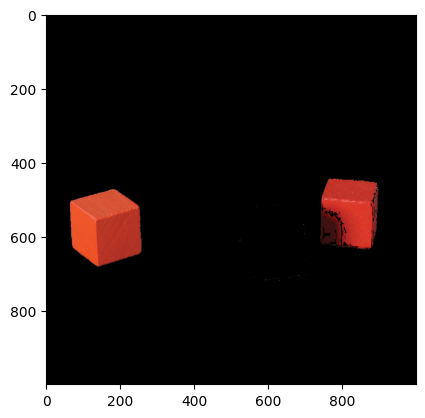

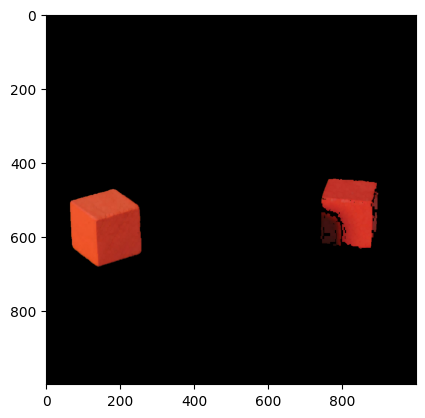

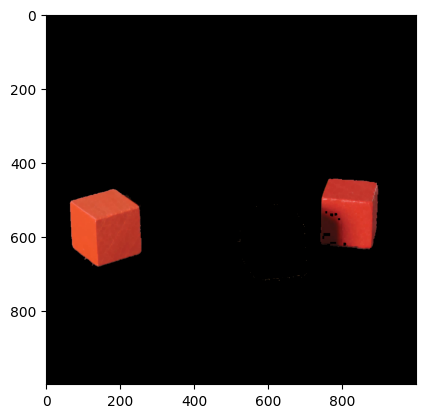

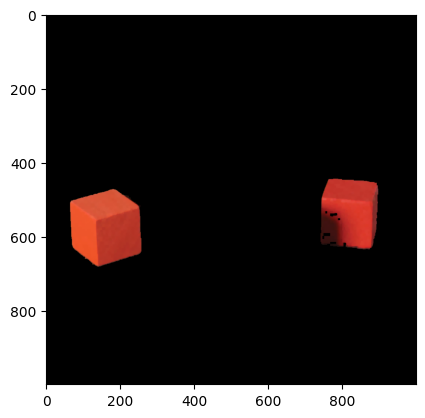

In [96]:
# TODO: Morphological operations are super helpful in denoising and rounding out your mask.
# Resource: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

plt.imshow(red_result)
plt.show()

opening = cv.morphologyEx(red_result, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_RECT,(5,5)))
plt.imshow(opening)
plt.show()

closing = cv.morphologyEx(red_result, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_RECT,(5,5)))
plt.imshow(closing)
plt.show()

openAfterClosing = cv.morphologyEx(closing, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_RECT,(5,5)))
plt.imshow(openAfterClosing)
plt.show()

4. Bounding box and segmentation visualization

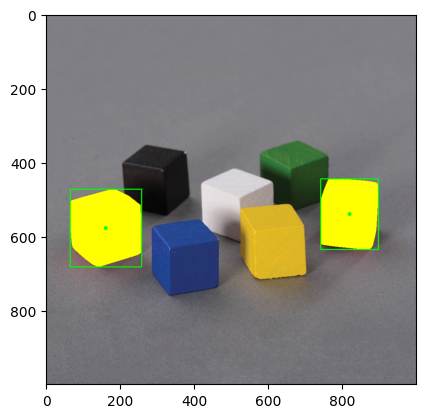

In [115]:
# TODO: Use a combination of cv.findContours, cv.drawContours and OpenCV's bitwise operations to obtain a bounding box and segmentation visualization as in the image below.
img = cv.cvtColor(cv.imread('./img/cubes.jpg'), cv.COLOR_BGR2RGB)

grey_openAftClose = cv.cvtColor(openAfterClosing, cv.COLOR_BGR2GRAY)
contours, hierarchy = cv.findContours(grey_openAftClose, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    # CHAIN_APPROX_SIMPLE removes all redundant points of contour and compresses the contour

# boundingBoxes = cv.drawContours(grey_openAftClose, contours, -1, (0,255,0), 3)
    # first argument is source image, second argument is the contours which should be passed as a Python list,
    # third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1)
    # and remaining arguments are color, thickness

# showTogether = cv.bitwise_and(boundingBox, img)
# plt.imshow(boundingBoxes)
# print(contours)

# cv.drawContours(img, contours, -1, (0,255,0), 3)
# cv.imshow('contours', img)
# cv.waitKey(0)

# convex hull code from here: https://theailearner.com/tag/contours-opencv/
for i in range(len(contours)):
    hull = cv.convexHull(contours[i])
    cv.drawContours(img, [hull], -1, (255, 255, 0), -1)
# Display the final convex hull image
# plt.imshow(img)

# Iterate through contours
for contour in contours:
    # Get bounding rectangle
    x, y, w, h = cv.boundingRect(contour)
    # Calculate centroid
    center_x = x + w // 2
    center_y = y + h // 2

    # Draw bounding box and centroid
    cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle
    cv.circle(img, (center_x, center_y), 5, (0, 255, 0), -1)  # Red circle for centroid

# Display the image with bounding boxes and centroids
plt.imshow(img)

## Example Solution

<img src=".\img\ex-solution1.png" width="800">


## TODO
#### Generate an object detection solution for (i) the RED cubes, (ii) the YELLOW cubes
